# Feature Engineering v2

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df = pd.read_csv(
    "../data/processed/hourly_energy.csv",
    parse_dates=["datetime"],
    index_col="datetime"
).sort_index()

df.head()

,Global_active_power
datetime,
2006-12-16 17:00:00,4.2229
2006-12-16 18:00:00,3.6322
2006-12-16 19:00:00,3.4002
2006-12-16 20:00:00,3.2686
2006-12-16 21:00:00,3.0565


In [2]:
target = "Global_active_power"

### Time Features

In [3]:
df_feat = df.copy()

df_feat["hour"] = df_feat.index.hour
df_feat["dayofweek"] = df_feat.index.dayofweek
df_feat["month"] = df_feat.index.month

### Lag Features

In [4]:
df_feat["lag_1"] = df_feat[target].shift(1)
df_feat["lag_24"] = df_feat[target].shift(24)
df_feat["lag_168"] = df_feat[target].shift(168)

### Rolling Features

In [ ]:
# rolling mean(24hr)
df_feat["rolling_mean_24"] = (
    df_feat[target]
    .shift(1)
    .rolling(window=24)
    .mean()
)

In [ ]:
# rolling std(24hr)
df_feat["rolling_std_24"] = (
    df_feat[target]
    .shift(1)
    .rolling(window=24)
    .std()
)

In [8]:
# rolling mean(7days = 168hours)
df_feat["rolling_mean_168"] = (
    df_feat[target]
    .shift(1)
    .rolling(window=168)
    .mean()
)

### Cycle Encoding

In [9]:
df_feat["hour_sin"] = np.sin(2 * np.pi * df_feat["hour"] / 24)
df_feat["hour_cos"] = np.cos(2 * np.pi * df_feat["hour"] / 24)

In [10]:
# dropping missing values
df_feat = df_feat.dropna()
df_feat.shape

(34421, 12)

### Defining feature(X) and target(y)

In [11]:
feature_cols = [
    "dayofweek",
    "month",
    "hour_sin",
    "hour_cos",
    "lag_1",
    "lag_24",
    "lag_168",
    "rolling_mean_24",
    "rolling_std_24",
    "rolling_mean_168"
]

X = df_feat[feature_cols]
y = df_feat[target]

In [12]:
X.head()

,dayofweek,month,hour_sin,hour_cos,lag_1,lag_24,lag_168,rolling_mean_24,rolling_std_24,rolling_mean_168
datetime,,,,,,,,,,
2006-12-23 17:00:00,5,12,-0.965926,-2.588190e-01,4.3491,1.4968,4.2229,2.934900,0.990192,1.763946
2006-12-23 18:00:00,5,12,-1.000000,-1.836970e-16,5.4525,2.6870,3.6322,3.099721,1.066674,1.771265
2006-12-23 19:00:00,5,12,-0.965926,2.588190e-01,3.8794,3.9382,3.4002,3.149404,1.074357,1.772736
2006-12-23 20:00:00,5,12,-0.866025,5.000000e-01,4.1178,3.5361,3.2686,3.156887,1.080697,1.777008
2006-12-23 21:00:00,5,12,-0.707107,7.071068e-01,4.1814,4.5487,3.0565,3.183775,1.098424,1.782441


### Time Split

In [13]:
n = len(df_feat)
train_end = int(n * 0.70)
val_end = int(n * 0.85)

X_train = X.iloc[:train_end]
y_train = y.iloc[:train_end]

X_val = X.iloc[train_end:val_end]
y_val = y.iloc[train_end:val_end]

X_test = X.iloc[val_end:]
y_test = y.iloc[val_end:]

len(X_train), len(X_val), len(X_test)

(24094, 5163, 5164)

### Quick Check by plot

<Axes: xlabel='datetime'>

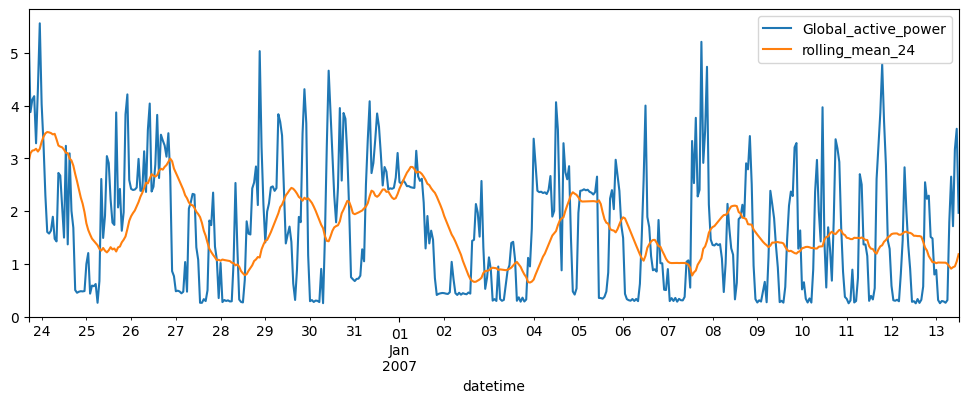

In [15]:
df_feat[[target, "rolling_mean_24"]].iloc[:500].plot(figsize=(12,4))